In [1]:
# Importing necessary libraries
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [5]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


In [6]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['size_category']= label_encoder.fit_transform(data['size_category'])

In [7]:
data=data.drop(columns=['month','day'], axis=1)
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [9]:
x = data.iloc[:,0:-1]
y = data['size_category']

In [10]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [13]:
#Artificial Neural Network Model - Backpropagation

In [14]:
# create model
model = Sequential()
model.add(Dense(42, input_dim=28, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Fit the model
history=model.fit(x_train,y_train, validation_split=0.33, epochs=180, batch_size=10)

Epoch 1/180
28/28 [==============================] - 1s 10ms/step - loss: 8.6412 - accuracy: 0.6159 - val_loss: 3.2718 - val_accuracy: 0.7372
Epoch 2/180
28/28 [==============================] - 0s 3ms/step - loss: 2.4987 - accuracy: 0.6087 - val_loss: 0.6413 - val_accuracy: 0.7883
Epoch 3/180
28/28 [==============================] - 0s 2ms/step - loss: 0.9048 - accuracy: 0.6920 - val_loss: 0.4104 - val_accuracy: 0.7956
Epoch 4/180
28/28 [==============================] - 0s 3ms/step - loss: 0.5413 - accuracy: 0.7246 - val_loss: 0.3452 - val_accuracy: 0.9124
Epoch 5/180
28/28 [==============================] - 0s 3ms/step - loss: 0.5521 - accuracy: 0.7609 - val_loss: 0.2936 - val_accuracy: 0.8905
Epoch 6/180
28/28 [==============================] - 0s 3ms/step - loss: 0.4728 - accuracy: 0.8225 - val_loss: 0.4559 - val_accuracy: 0.7956
Epoch 7/180
28/28 [==============================] - 0s 3ms/step - loss: 0.3600 - accuracy: 0.8514 - val_loss: 0.2542 - val_accuracy: 0.9270
Epoch 8/180


In [17]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.0341 - accuracy: 0.9826
accuracy: 98.26%


In [18]:
# Visualize training history

# list all data in history
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

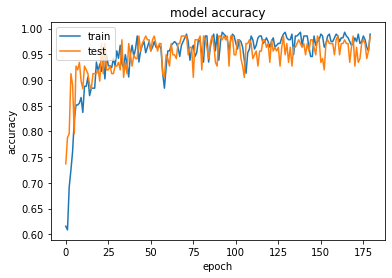

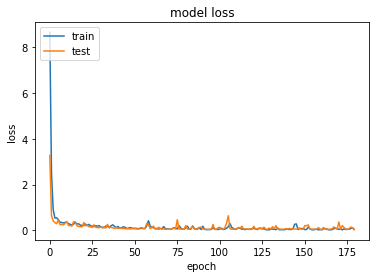

In [19]:
# summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
#Hyper Parameter Tuning

In [21]:
X = data.iloc[:,0:-1]
Y = data['size_category']

In [22]:
# Standardization
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [23]:
pd.DataFrame(X_standardized).describe().T

,count,mean,std,min,25%,50%,75%,max
0,517.0,-1.754024e-15,1.000969,-13.045818,-0.080635,0.173229,0.408960,1.007353
1,517.0,3.070830e-16,1.000969,-1.715608,-0.660665,-0.040203,0.492739,2.819865
2,517.0,7.387171e-17,1.000969,-2.179108,-0.444828,0.469119,0.669663,1.261610
3,517.0,-3.865380e-17,1.000969,-1.980578,-0.553595,-0.136477,0.390409,10.335381
4,517.0,2.005703e-16,1.000969,-2.876943,-0.584238,0.070821,0.674164,2.484195
5,517.0,3.362881e-16,1.000969,-1.796637,-0.692456,-0.140366,0.534411,3.417549
6,517.0,-2.676776e-16,1.000969,-2.021098,-0.736124,-0.009834,0.492982,3.007063
7,517.0,-2.841054e-16,1.000969,-0.073268,-0.073268,-0.073268,-0.073268,21.572284
8,517.0,-1.274502e-16,1.000969,-0.202020,-0.202020,-0.193843,-0.098709,16.951110
9,517.0,4.874674e-17,1.000969,-0.443576,-0.443576,-0.443576,-0.443576,2.254407


In [24]:
#Tuning of Hyperparameters :- Batch Size and Epochs

In [25]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [26]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [27]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6444\1903461034.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)
C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.971 total time=   1.3s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.846 total time=   1.2s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.913 total time=   1.5s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.883 total time=   1.5s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.854 total time=   2.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=0.971 total time=   2.8s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/9] END .....batch_size=10, epochs=50;, score=0.856 total time=   3.3s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/9] END .....batch_size=10, epochs=50;, score=0.874 total time=   3.8s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/9] END .....batch_size=10, epochs=50;, score=0.913 total time=   4.8s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/9] END .....batch_size=10, epochs=50;, score=0.893 total time=   3.0s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/9] END ....batch_size=10, epochs=100;, score=1.000 total time=   5.6s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/9] END ....batch_size=10, epochs=100;, score=0.846 total time=   8.0s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/9] END ....batch_size=10, epochs=100;, score=0.883 total time=   5.6s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/9] END ....batch_size=10, epochs=100;, score=0.913 total time=   9.1s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/9] END ....batch_size=10, epochs=100;, score=0.883 total time=   5.2s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/9] END .....batch_size=20, epochs=10;, score=0.990 total time=   1.2s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/9] END .....batch_size=20, epochs=10;, score=0.846 total time=   1.0s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/9] END .....batch_size=20, epochs=10;, score=0.816 total time=   0.9s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/9] END .....batch_size=20, epochs=10;, score=0.893 total time=   1.7s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/9] END .....batch_size=20, epochs=10;, score=0.854 total time=   2.3s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/9] END .....batch_size=20, epochs=50;, score=1.000 total time=   2.9s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/9] END .....batch_size=20, epochs=50;, score=0.894 total time=   2.0s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/9] END .....batch_size=20, epochs=50;, score=0.883 total time=   1.7s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/9] END .....batch_size=20, epochs=50;, score=0.922 total time=   2.2s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/9] END .....batch_size=20, epochs=50;, score=0.883 total time=   1.9s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/9] END ....batch_size=20, epochs=100;, score=0.962 total time=   5.0s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/9] END ....batch_size=20, epochs=100;, score=0.846 total time=   4.2s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/9] END ....batch_size=20, epochs=100;, score=0.883 total time=   3.4s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/9] END ....batch_size=20, epochs=100;, score=0.922 total time=   3.2s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/9] END ....batch_size=20, epochs=100;, score=0.883 total time=   5.2s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/9] END .....batch_size=40, epochs=10;, score=0.981 total time=   1.7s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/9] END .....batch_size=40, epochs=10;, score=0.760 total time=   1.0s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/9] END .....batch_size=40, epochs=10;, score=0.524 total time=   0.9s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.680 total time=   0.8s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.806 total time=   0.8s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=1.000 total time=   1.4s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.846 total time=   1.7s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.883 total time=   1.4s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.913 total time=   2.3s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.864 total time=   2.8s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=1.000 total time=   3.0s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.875 total time=   2.0s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.893 total time=   1.9s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.883 total time=   2.4s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.903 total time=   2.8s


In [28]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9167102336883545, using {'batch_size': 20, 'epochs': 50}
0.8935586333274841,0.0453182669810321 with: {'batch_size': 10, 'epochs': 10}
0.901306939125061,0.039757598010894374 with: {'batch_size': 10, 'epochs': 50}
0.9051531076431274,0.051905209613516204 with: {'batch_size': 10, 'epochs': 100}
0.8799290537834168,0.06052679441874298 with: {'batch_size': 20, 'epochs': 10}
0.9167102336883545,0.04400131104576081 with: {'batch_size': 20, 'epochs': 50}
0.8994025349617004,0.03931425667666764 with: {'batch_size': 20, 'epochs': 100}
0.7500186562538147,0.14991401857013623 with: {'batch_size': 40, 'epochs': 10}
0.9012696146965027,0.05406194494163243 with: {'batch_size': 40, 'epochs': 50}
0.9109223246574402,0.04550954857400078 with: {'batch_size': 40, 'epochs': 100}


In [29]:
#Tuning of Hyperparameters:- Learning rate and Drop out rate

In [30]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6444\3315804937.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.971 total time=   0.9s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.750 total time=   1.1s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.534 total time=   0.9s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.680 total time=   1.8s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.699 total time=   1.3s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.981 total time=   1.1s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.769 total time=   0.9s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.680 total time=   1.1s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.718 total time=   0.8s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.786 total time=   0.9s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   0.8s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.808 total time=   0.9s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.524 total time=   2.1s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.757 total time=   2.3s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.864 total time=   1.7s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   0.9s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.750 total time=   1.4s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.524 total time=   1.0s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.680 total time=   1.0s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.699 total time=   1.1s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.942 total time=   1.3s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.750 total time=   1.1s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.524 total time=   0.9s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.748 total time=   2.1s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.786 total time=   2.3s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=1.000 total time=   1.9s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.760 total time=   0.9s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.524 total time=   1.0s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.825 total time=   1.2s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.699 total time=   0.9s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=1.000 total time=   1.0s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.750 total time=   1.0s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.524 total time=   1.2s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.680 total time=   1.0s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.709 total time=   1.3s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.990 total time=   2.4s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.750 total time=   2.4s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.660 total time=   1.0s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.767 total time=   1.0s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.699 total time=   1.1s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.990 total time=   1.3s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.750 total time=   1.0s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.524 total time=   1.1s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.680 total time=   1.0s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.699 total time=   1.0s


In [31]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7906646728515625, using {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7267550468444824,0.1417210764724635 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7868932008743286,0.10401382470945718 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7906646728515625,0.15593605185038814 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7501120328903198,0.13361647289250625 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7616318106651306,0.1556461699480205 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7325242638587952,0.15400213076804797 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7733196496963501,0.11490651104685592 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.728659451007843,0.1510055827692834 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [32]:
#Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [33]:
from keras.layers import Dropout
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6444\3991236647.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   1.1s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   1.6s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.476 total time=   2.1s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.680 total time=   1.6s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   0.9s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=1.000 total time=   0.9s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.250 total time=   0.9s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.524 total time=   1.3s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.680 total time=   0.9s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.699 total time=   1.0s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=   1.2s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.750 total time=   2.6s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.524 total time=   2.1s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.680 total time=   1.4s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.301 total time=   1.0s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   1.3s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.750 total time=   0.9s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.524 total time=   0.9s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.680 total time=   1.0s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.709 total time=   1.1s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=0.990 total time=   0.8s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.750 total time=   1.0s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.524 total time=   1.6s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.680 total time=   2.9s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.689 total time=   2.3s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=1.000 total time=   0.9s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.750 total time=   0.9s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.524 total time=   1.0s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.680 total time=   1.2s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.699 total time=   0.9s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=0.952 total time=   1.0s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.750 total time=   0.8s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.612 total time=   1.1s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.680 total time=   1.0s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.718 total time=   1.9s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=0.990 total time=   2.0s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.750 total time=   2.0s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.563 total time=   0.9s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.689 total time=   0.9s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.709 total time=   1.0s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=1.000 total time=   0.9s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.750 total time=   1.5s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.524 total time=   1.0s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.680 total time=   0.8s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.699 total time=   0.9s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=0.942 total time=   1.3s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.750 total time=   1.9s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.602 total time=   2.0s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.680 total time=   1.8s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.709 total time=   1.1s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.971 total time=   0.9s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.750 total time=   1.0s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.602 total time=   0.9s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.689 total time=   1.1s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.699 total time=   1.0s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=1.000 total time=   0.8s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.750 total time=   0.9s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.524 total time=   0.9s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.680 total time=   2.1s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.699 total time=   1.9s


In [34]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7423263549804687, using {'activation_function': 'tanh', 'init': 'uniform'}
0.5208737850189209,0.2766888088877092 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.6305825233459472,0.24482772813004766 with: {'activation_function': 'softmax', 'init': 'normal'}
0.45097087025642396,0.27310905134889035 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7325242638587952,0.15400213076804797 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7267176985740662,0.15143591735437695 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.7423263549804687,0.11451570735468528 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7403099298477173,0.13973470943929384 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.7365197896957397,0.11371192105575179 with: {'activati

In [35]:
#Tuning of Hyperparameter :-Number of Neurons in activation layer

In [36]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6444\2663671110.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.962 total time=   1.1s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.750 total time=   1.5s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.544 total time=   1.5s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.680 total time=   1.3s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.718 total time=   0.9s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.981 total time=   1.1s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.750 total time=   0.9s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.583 total time=   2.2s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.680 total time=   2.1s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.718 total time=   2.4s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/9] END .........neuron1=4, neuron2=8;, score=1.000 total time=   1.0s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.750 total time=   0.9s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.583 total time=   1.0s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.680 total time=   1.1s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.718 total time=   1.3s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.981 total time=   0.9s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.750 total time=   1.1s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.621 total time=   0.9s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.680 total time=   2.0s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.699 total time=   1.9s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.962 total time=   2.0s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.750 total time=   1.1s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.612 total time=   1.3s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.680 total time=   0.9s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.699 total time=   0.9s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.942 total time=   0.9s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.750 total time=   1.1s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.612 total time=   0.8s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.689 total time=   1.0s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.699 total time=   0.9s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.962 total time=   1.7s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.750 total time=   2.6s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.602 total time=   1.4s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.689 total time=   0.9s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.689 total time=   0.9s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.933 total time=   1.4s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.750 total time=   0.9s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.650 total time=   0.9s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.699 total time=   1.0s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.699 total time=   1.0s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.962 total time=   0.9s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.750 total time=   0.9s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.641 total time=   1.1s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.689 total time=   2.3s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.718 total time=   1.9s


In [37]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7520164251327515, using {'neuron1': 16, 'neuron2': 8}
0.7306571960449219,0.13519765469567385 with: {'neuron1': 4, 'neuron2': 2}
0.7422703504562378,0.13187414013083615 with: {'neuron1': 4, 'neuron2': 4}
0.7461165070533753,0.13886888958859903 with: {'neuron1': 4, 'neuron2': 8}
0.7461538434028625,0.12432334151520222 with: {'neuron1': 8, 'neuron2': 2}
0.7403659343719482,0.11914493496620072 with: {'neuron1': 8, 'neuron2': 4}
0.7384615421295166,0.11111904628923971 with: {'neuron1': 8, 'neuron2': 8}
0.7384241938591003,0.12113115620435422 with: {'neuron1': 16, 'neuron2': 2}
0.7462472081184387,0.09839233243248231 with: {'neuron1': 16, 'neuron2': 4}
0.7520164251327515,0.11075697876455771 with: {'neuron1': 16, 'neuron2': 8}


In [38]:
#Training model with optimum values of Hyperparameters

In [39]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Fitting the model

model.fit(X_standardized,Y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(Y,y_predict))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6444\402875659.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


17/17 [==============================] - 0s 3ms/step
0.7775628626692457


In [40]:
#Hyperparameters all at once

In [41]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [42]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6444\2849873856.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


In [43]:
# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

In [44]:
# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

In [ ]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   1.7s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   1.6s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   1.8s
[CV 4/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   1.6s
[CV 5/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   2.0s
[CV 1/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   1.4s
[CV 2/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   2.2s
[CV 3/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   2.2s
[CV 4/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   1.6s
[CV 5/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=   1.4s
[CV 1/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   1.3s
[CV 2/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   1.4s
[CV 3/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   1.3s
[CV 4/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   1.6s
[CV 5/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   2.6s
[CV 1/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   2.8s
[CV 2/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   1.6s
[CV 3/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   1.1s
[CV 4/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.680 total time=   1.7s
[CV 5/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.301 total time=   1.2s
[CV 1/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   1.3s
[CV 2/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   1.6s
[CV 3/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   1.6s
[CV 4/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   3.1s
[CV 5/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   2.8s
[CV 1/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   1.2s
[CV 2/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   1.2s
[CV 3/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   1.5s
[CV 4/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.680 total time=   1.2s
[CV 5/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   1.2s
[CV 1/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   1.3s
[CV 2/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   2.5s
[CV 3/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   2.5s
[CV 4/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   2.7s
[CV 5/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=   1.3s
[CV 1/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   1.2s
[CV 2/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   1.4s
[CV 3/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   1.3s
[CV 4/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.680 total time=   1.2s
[CV 5/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   1.3s
[CV 1/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   2.6s
[CV 2/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   2.5s
[CV 3/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   2.4s
[CV 4/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   1.1s
[CV 5/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   1.2s
[CV 1/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.952 total time=   1.7s
[CV 2/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.808 total time=   1.3s
[CV 3/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.806 total time=   1.2s
[CV 4/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.796 total time=   1.3s
[CV 5/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.864 total time=   2.8s
[CV 1/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.971 total time=   2.5s
[CV 2/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.837 total time=   1.5s
[CV 3/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.854 total time=   1.1s
[CV 4/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.835 total time=   1.2s
[CV 5/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.854 total time=   1.5s
[CV 1/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   1.1s
[CV 2/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.798 total time=   1.3s
[CV 3/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.816 total time=   1.3s
[CV 4/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.874 total time=   2.8s
[CV 5/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.883 total time=   2.7s
[CV 1/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=1.000 total time=   1.8s
[CV 2/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.798 total time=   1.2s
[CV 3/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.786 total time=   1.1s
[CV 4/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.845 total time=   1.5s
[CV 5/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.864 total time=   1.2s
[CV 1/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.962 total time=   1.3s
[CV 2/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.817 total time=   1.1s
[CV 3/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.777 total time=   2.0s
[CV 4/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.825 total time=   2.5s
[CV 5/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.874 total time=   2.4s
[CV 1/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.923 total time=   1.3s
[CV 2/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.817 total time=   1.1s
[CV 3/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.796 total time=   1.4s
[CV 4/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.825 total time=   1.3s
[CV 5/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.854 total time=   1.4s
[CV 1/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.990 total time=   1.2s
[CV 2/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.798 total time=   1.5s
[CV 3/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.777 total time=   2.6s
[CV 4/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.767 total time=   2.5s
[CV 5/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.864 total time=   1.6s
[CV 1/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.981 total time=   1.2s
[CV 2/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.817 total time=   1.6s
[CV 3/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.728 total time=   1.2s
[CV 4/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.806 total time=   1.3s
[CV 5/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.806 total time=   1.3s
[CV 1/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.923 total time=   1.4s
[CV 2/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.798 total time=   2.1s
[CV 3/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.777 total time=   2.4s
[CV 4/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.816 total time=   2.1s
[CV 5/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.883 total time=   1.2s
[CV 1/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.952 total time=   1.5s
[CV 2/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.721 total time=   1.1s
[CV 3/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.524 total time=   1.4s
[CV 4/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.796 total time=   1.2s
[CV 5/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.767 total time=   1.4s
[CV 1/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.971 total time=   1.4s
[CV 2/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.760 total time=   2.5s
[CV 3/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.718 total time=   2.5s
[CV 4/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.757 total time=   1.4s
[CV 5/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.796 total time=   1.5s
[CV 1/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.846 total time=   1.1s
[CV 2/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.798 total time=   1.1s
[CV 3/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.641 total time=   1.2s
[CV 4/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.699 total time=   1.4s
[CV 5/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.796 total time=   1.3s
[CV 1/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.817 total time=   1.7s
[CV 2/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.779 total time=   2.5s
[CV 3/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.524 total time=   2.4s
[CV 4/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.718 total time=   1.4s
[CV 5/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.748 total time=   1.3s
[CV 1/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.817 total time=   1.2s
[CV 2/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.769 total time=   1.2s
[CV 3/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.631 total time=   1.6s
[CV 4/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.767 total time=   1.2s
[CV 5/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.767 total time=   1.2s
[CV 1/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.798 total time=   2.5s
[CV 2/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.760 total time=   2.5s
[CV 3/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.670 total time=   1.9s
[CV 4/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.748 total time=   1.1s
[CV 5/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.748 total time=   1.2s
[CV 1/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.942 total time=   1.3s
[CV 2/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.769 total time=   1.6s
[CV 3/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.621 total time=   1.2s
[CV 4/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.699 total time=   1.2s
[CV 5/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.621 total time=   1.8s
[CV 1/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=1.000 total time=   2.6s
[CV 2/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.760 total time=   2.6s
[CV 3/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.670 total time=   1.4s
[CV 4/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.718 total time=   1.1s
[CV 5/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.670 total time=   1.4s
[CV 1/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.808 total time=   1.4s
[CV 2/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.740 total time=   1.3s
[CV 3/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.650 total time=   1.2s
[CV 4/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.718 total time=   1.3s
[CV 5/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.680 total time=   2.5s
[CV 1/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   2.7s
[CV 2/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   1.5s
[CV 3/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   1.2s
[CV 4/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   1.4s
[CV 5/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   1.4s
[CV 1/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   1.2s
[CV 2/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   1.2s
[CV 3/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   1.2s
[CV 4/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   1.7s
[CV 5/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=   3.2s
[CV 1/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   2.3s
[CV 2/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   1.4s
[CV 3/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   1.3s
[CV 4/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   1.7s
[CV 5/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   1.4s
[CV 1/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.000 total time=   1.5s
[CV 2/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.250 total time=   1.6s
[CV 3/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   2.9s
[CV 4/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.680 total time=   2.9s
[CV 5/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   1.3s
[CV 1/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   1.2s
[CV 2/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   1.2s
[CV 3/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   1.5s
[CV 4/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   1.3s
[CV 5/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   1.3s
[CV 1/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   1.7s
[CV 2/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   3.0s
[CV 3/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   3.0s
[CV 4/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.680 total time=   1.3s
[CV 5/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   1.3s
[CV 1/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   1.2s
[CV 2/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   1.8s
[CV 3/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   1.9s
[CV 4/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   3.0s
[CV 5/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=   2.6s
[CV 1/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   2.8s
[CV 2/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   1.6s
[CV 3/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   1.2s
[CV 4/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.680 total time=   1.2s
[CV 5/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   1.3s
[CV 1/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   1.4s
[CV 2/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   1.2s
[CV 3/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   2.3s
[CV 4/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   2.5s
[CV 5/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   2.0s
[CV 1/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.971 total time=   1.7s
[CV 2/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.837 total time=   1.2s
[CV 3/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.757 total time=   1.2s
[CV 4/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.874 total time=   1.2s
[CV 5/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.835 total time=   1.4s
[CV 1/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.981 total time=   1.2s
[CV 2/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
